<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Instructor: Husain Amer_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

### At some places, I have intentionally left the code to help you guys. Understand the process!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
NHL = pd.read_csv(web_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A:
NHL.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [5]:
# shape
NHL.shape

(90, 28)

In [6]:
# Summaray stat
NHL.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


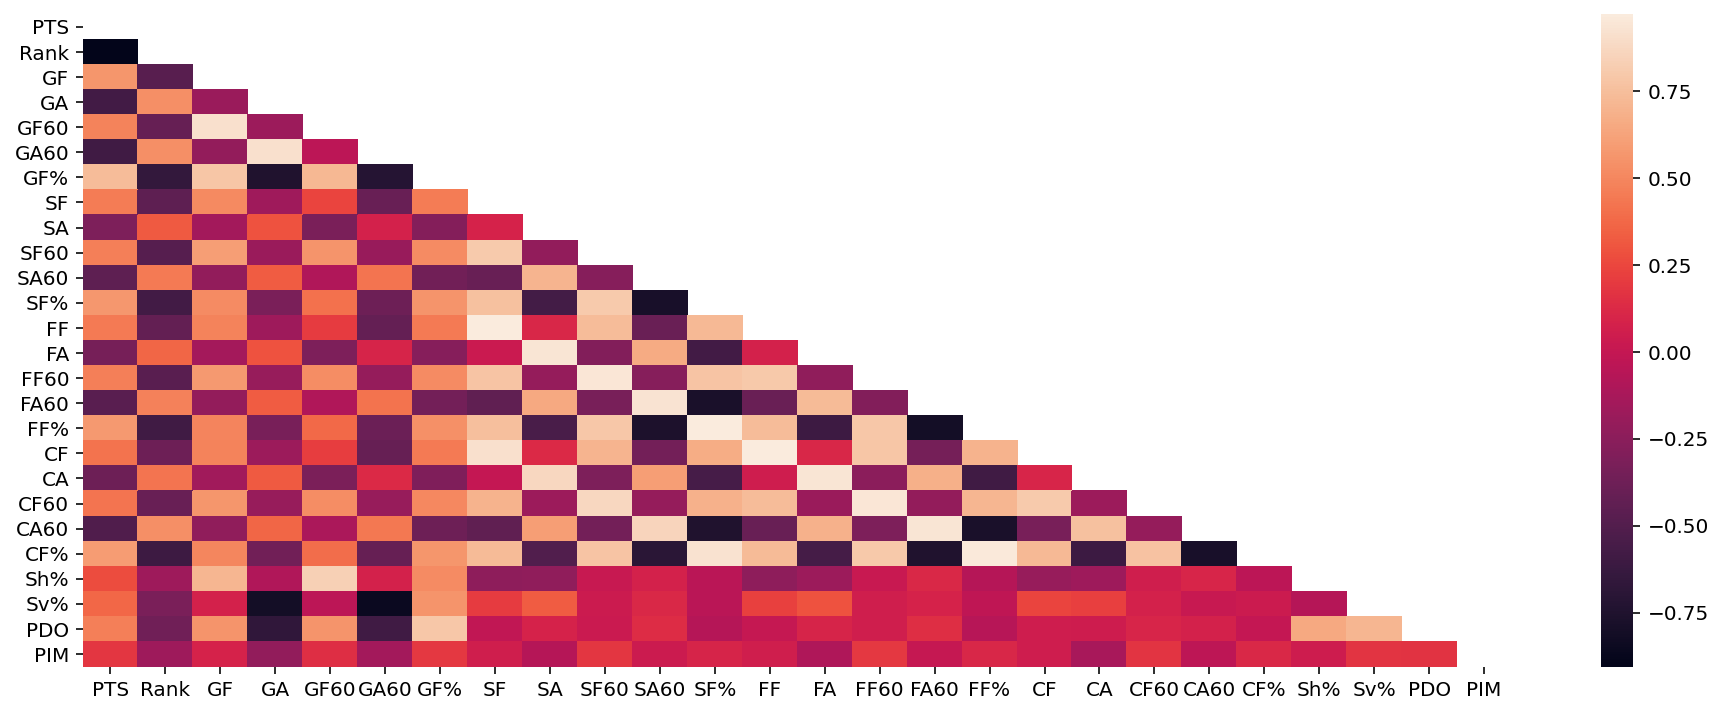

In [7]:
corr = NHL.corr()

fig, ax = plt.subplots(figsize=(16,6))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)#, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [8]:
# A:
NHL.Rank.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?
The code is provided, we will learn more about baseline accuracy in the evaluation lecture. 

In [70]:
# A:
NHL[NHL.Rank == 3].shape[0]/NHL.shape[0]

0.34444444444444444

In [67]:
baseline_acc = 1. - NHL[NHL.Rank == 3].shape[0]/NHL.shape[0]
baseline_acc

0.6555555555555556

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [11]:
# CODE HERE PLEASE
NHL.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [16]:
# get the columns here 

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [12]:
# CODE HERE PLEASE
NHL.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [17]:
# data types

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [ ]:
# Get ['PTS','GF%','CF','PDO'] columns in features 

In [13]:
# A:
X = NHL[['PTS','GF%','CF','PDO']]
y = NHL['Rank']

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [14]:
# A: do the required imports 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
#scaling training data 
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [16]:
# CODE HERE PLEASE
# fit the knn classifier
# A:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [21]:
# NO Code here
# fit the knn classifier
# A:


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [17]:
# A:
knn.score(X_scaled , y) 

1.0

#Yes it's better than the baseline 1>0.65

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [71]:
# A:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .5 , stratify = y)

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [72]:
# A:
#data scaling :
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [73]:
# CODE HERE PLEASE
n_neighbors=X_train_ss.shape[0]
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_ss, y_train)
knn.score(X_test_ss,y_test)
# The score is worse than the baseline

0.3111111111111111

In [25]:
# model training -- n_neighbors=X_train_ss.shape[0] -- number_of_rows

# The number below is score -- worse than the baseline???

0.35555555555555557

# Let's find the best value of `k` using accuracy score, you can try errors (ref elbow method from lecture) to see the difference. 

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

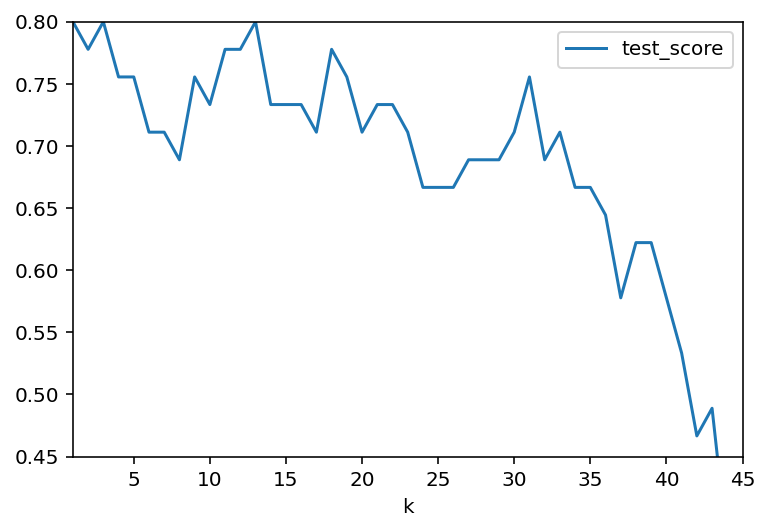

In [74]:
# CODE HERE PLEASE
score_rate = []

# Let's run a for loop for k from 1 to 45, we can use range() method
for i in range(1,46):
    
    # Initializing knn for k = i
    knn_sc = KNeighborsClassifier(n_neighbors=i)
    
    # fitting knn 
    knn_sc.fit(X_train_ss,y_train)
    
    # predicting for k = i
    prediction_i = knn_sc.predict(X_test_ss)
    
    # scpre rate for k = i -- appending to the list 'score_rate'
    # Avg of predictions and y_test if both not equal, then subtract by 1 to get test_score 
    score_rate.append(1 - np.mean(prediction_i != y_test))
    
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(range(1,46), score_rate)
plt.legend(['test_score'])
plt.ylim([0.45,.8])
plt.margins(x=0)
plt.xlabel('k');

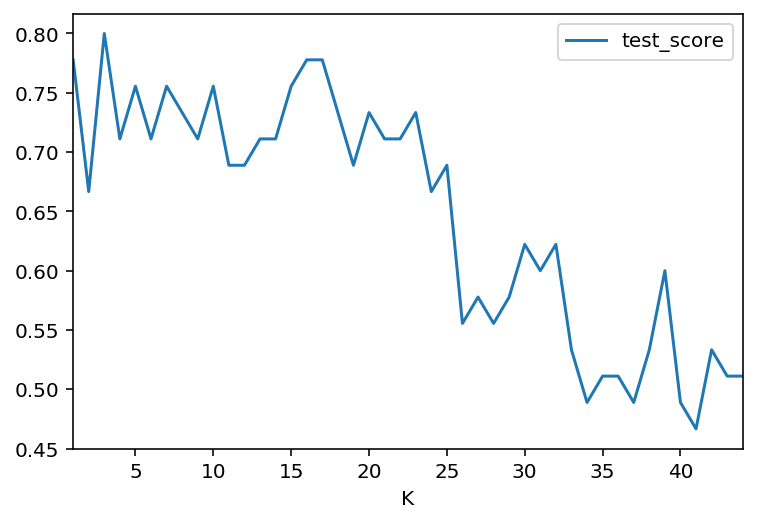

In [26]:
# A:
# A:
#training and testing the model


In [27]:
# Just leaving this code for your help!
print('Best K values')
for i in range(len(scores)):
    if scores[i] == max(scores):
        print('k:',Ks[i])

Best K values
k: 3


# Recall your knowledge from the previous week on cross-validation!

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [23]:
# A:
from sklearn.model_selection import cross_val_score

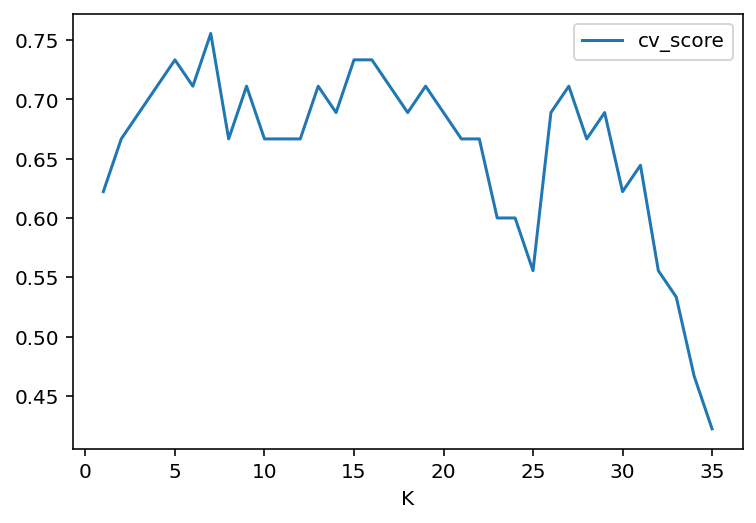

In [75]:
# A:
cv = 5
Ks_cv =[]
max_ = len(X_train_ss)//cv *(cv-1)
scores_cv = []
for k in range(1 , max_):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_k = np.mean(cross_val_score(knn_cv , X_train_ss , y_train , cv = cv))
    Ks_cv.append(k)
    scores_cv.append(score_k)

#plotting k and test scores
df_score_cv = pd.DataFrame({'K' : Ks_cv , 'cv_score' :scores_cv })
df_score_cv.plot(x = 'K' , y = 'cv_score');

Best K values from cross validation
k: 2


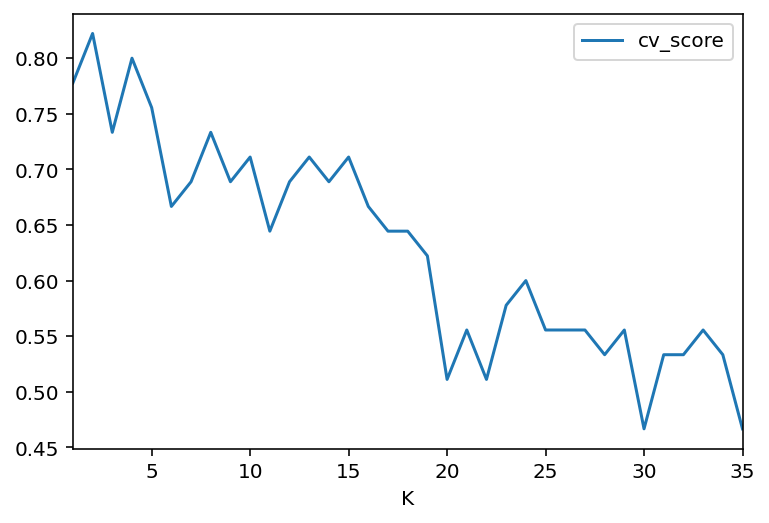

In [24]:
# CODE HERE PLEASE
cv = 5
Ks_cv =[]
max_ = len(X_train_ss)//cv *(cv-1)
scores_cv = []
for k in range(1 , max_):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_k = np.mean(cross_val_score(knn_cv , X_train_ss , y_train , cv = cv))
    Ks_cv.append(k)
    scores_cv.append(score_k)

#plotting k and test scores
df_score_cv = pd.DataFrame({'K' : Ks_cv , 'cv_score' :scores_cv })
df_score_cv.plot(x = 'K' , y = 'cv_score');
plt.margins(x=0);

In [25]:
# CODE HERE PLEASE
print('Best K values from cross validation (Standardize)')
for i in range(len(scores_cv)):
    if scores_cv[i] == max(scores_cv):
        print('k:',Ks_cv[i])

Best K values from cross validation (Standardize)
k: 2


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

To show the impact of distance unit variance between the features of data in K-NN model.

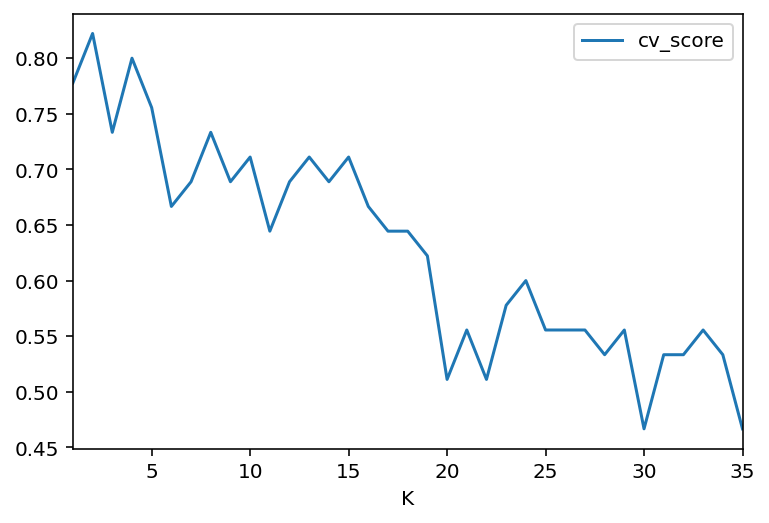

In [26]:
# CODE HERE PLEASE
cv = 5
Ks_cv =[]
max_ = len(X_train_ss)//cv *(cv-1)
scores_cv = []
for k in range(1 , max_):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_k = np.mean(cross_val_score(knn_cv , X_train_ss , y_train , cv = cv))
    Ks_cv.append(k)
    scores_cv.append(score_k)

#plotting k and test scores
df_score_cv = pd.DataFrame({'K' : Ks_cv , 'cv_score' :scores_cv })
df_score_cv.plot(x = 'K' , y = 'cv_score');
plt.margins(x=0);

In [27]:
# CODE HERE PLEASE
print('Best K values from cross validation (Standardize)')
for i in range(len(scores_cv)):
    if scores_cv[i] == max(scores_cv):
        print('k:',Ks_cv[i])

Best K values from cross validation (Standardize)
k: 2


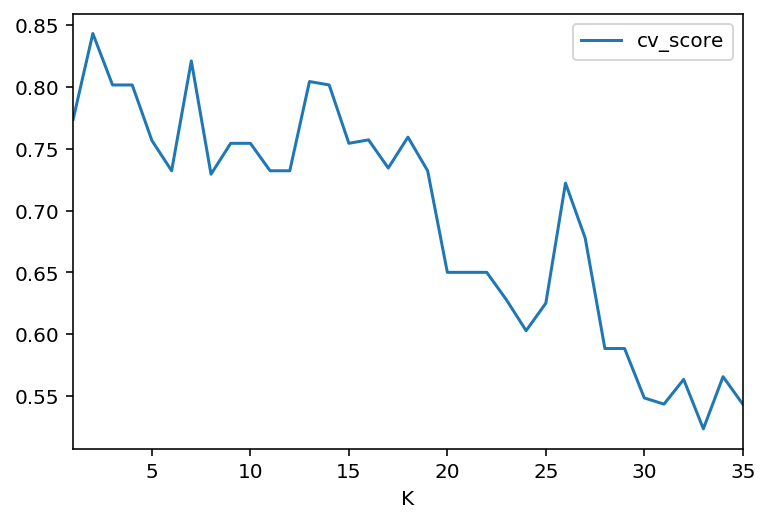

In [31]:
# A:
# with Standardization
# Hint: see the code above

Best K values from cross validation (Standardize)
k: 2


In [ ]:
# CODE HERE PLEASE

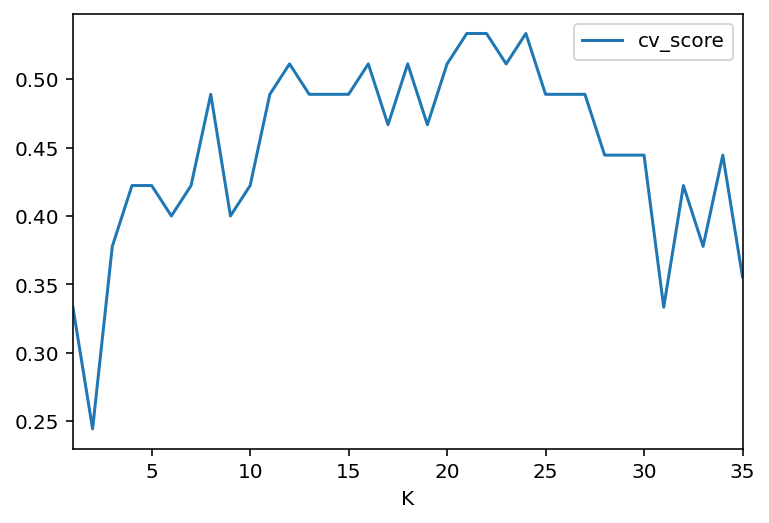

In [28]:
# How the accuracy plot look like without standrization
cv = 5
Ks_cv_unS =[]
max_ = len(X_train)//cv *(cv-1)
scores_cv_unS = []

# You need to write a for loop here to plot the values!
#
for k in range(1 , max_):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_k = np.mean(cross_val_score(knn_cv , X_train , y_train , cv = cv))
    Ks_cv_unS.append(k)
    scores_cv_unS.append(score_k)


#plotting k and test scores
df_score_cv = pd.DataFrame({'K' : Ks_cv_unS , 'cv_score' :scores_cv_unS })
df_score_cv.plot(x = 'K' , y = 'cv_score');
plt.margins(x=0);

In [29]:
#Max score
max(scores_cv_unS)

0.5333333333333333

In [30]:
# CODE HERE PLEASE
print('Best K values from cross validation (UnStandardize)')
for i in range(len(scores_cv_unS)):
    if scores_cv_unS[i] == max(scores_cv_unS):
        print('k:',Ks_cv_unS[i])

Best K values from cross validation (UnStandardize)
k: 22
k: 24


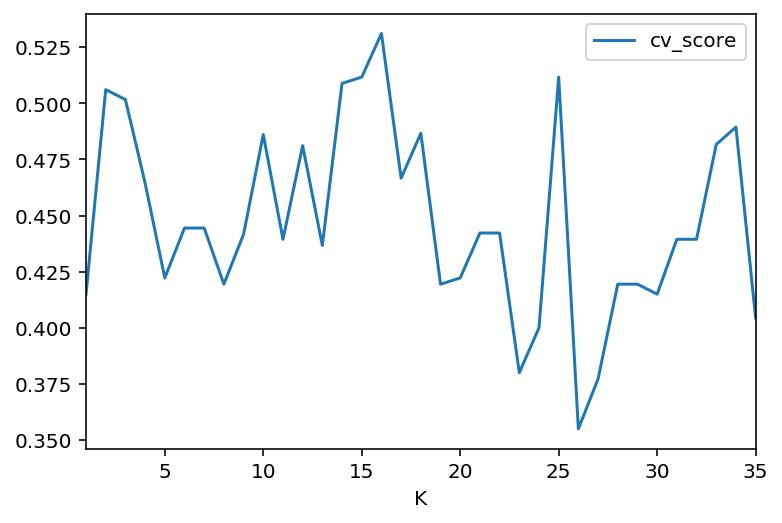

In [33]:
# How the accuracy plot look like without standrization
# DON"T CODE HERE!

In [34]:
#Max score
max(scores_cv_unS)

0.5311111111111111

In [35]:
print('Best K values from cross validation (Unstandardize)')
for i in range(len(scores_cv_unS)):
    if scores_cv_unS[i] == max(scores_cv_unS):
        print('k:',Ks_cv_unS[i])

Best K values from cross validation (Unstandardize)
k: 16
